# Node Machine Learning Competition

Every year, Node students engage in a friendly battle of machine learning models

The Node staff finds a dataset, reserves a portion of it for testing and then gives you guys a training dataset

This year, you all will be predicting whether or not it will rain tomorrow in Australia.

You will be given a dataset in the csv file `node_s19_ml_competition_train.csv`. **The goal of this challenge is to predict the `RainTomorrow` column given every other column.**

**Below is an example project containing an exploration section and a guide to how to submit your model**

# Experimentation

The first step in every data science project is to simply experiment with your dataset

Examine the dataset using `head()` and figure out what columns you want to drop or clean

You may consider encoding different columns-- certain models cannot handle textual columns so you may need to encode them using `pd.get_dummies()` or `df.cat.codes`

**Below, we walkthrough how you could potentially experiment using a `DummyClassifier`**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

!pip install seaborn==0.9.0 # you have to restart runtime to actually get to version 0.9.0
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error


# the two models we will be working with today
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# get the iris dataset
from sklearn import datasets
from sklearn import tree

In [2]:
train_dataset_filename = 'https://gist.githubusercontent.com/brian-yu/1d59e660bbad32ff918b81aaee2a9f87/raw/d6335dd483e4b2b39746e7f159a4bf845541f561/node_s19_ml_competition_train.csv'
rain_raw = pd.read_csv(train_dataset_filename)
rain_raw.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-07-31,3.8,21.1,0.0,2.4,9.7,SSW,19.0,NaN,S,0.0,11.0,74.0,38.0,1026.9,1023.9,1.0,0.0,11.7,20.2,No,No
1,2011-10-09,13.7,23.5,0.2,NaN,NaN,WSW,31.0,WNW,W,7.0,11.0,81.0,39.0,1008.6,1004.9,NaN,NaN,17.1,22.6,No,No
2,2011-10-25,2.8,16.5,2.2,3.4,11.1,SW,41.0,NNW,SE,19.0,9.0,55.0,41.0,1018.2,1016.9,NaN,NaN,8.7,15.6,Yes,No
3,2010-12-19,15.0,29.0,NaN,NaN,5.7,ESE,59.0,E,ESE,30.0,28.0,35.0,20.0,1012.0,1008.4,NaN,NaN,22.3,28.5,NaN,Yes
4,2016-02-05,16.3,32.0,0.0,5.4,12.9,NaN,NaN,E,NaN,4.0,NaN,80.0,NaN,1015.5,1014.7,0.0,NaN,21.0,NaN,No,No


In [3]:
rain = rain_raw.drop("Date", axis=1).dropna()
rain.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
9,3.2,12.1,0.0,2.8,3.9,ESE,41.0,SE,SE,17.0,20.0,69.0,51.0,1033.6,1033.2,7.0,5.0,9.3,11.1,No,No
10,8.9,21.5,0.0,2.6,4.5,WSW,20.0,NNE,W,9.0,11.0,80.0,57.0,1021.8,1020.8,7.0,3.0,13.1,20.7,No,Yes
11,23.1,32.5,0.0,9.8,9.9,NE,35.0,NNE,ENE,15.0,28.0,65.0,60.0,1012.7,1009.4,7.0,3.0,28.7,30.9,No,No
17,24.2,35.6,0.0,19.4,2.7,WSW,65.0,WSW,WNW,20.0,30.0,39.0,39.0,1004.4,1004.3,7.0,7.0,30.8,33.5,No,No
19,12.9,21.4,0.6,0.4,9.6,ESE,22.0,SW,ESE,4.0,9.0,76.0,57.0,1031.6,1029.4,3.0,2.0,16.6,19.5,No,No


In [0]:
# convert categorical string values to numerical

rain["WindDir9am"] = rain["WindDir9am"].astype('category')
rain["WindGustDir"] = rain["WindGustDir"].astype('category')
rain["WindDir3pm"] = rain["WindDir3pm"].astype('category')
rain["RainToday"] = rain["RainToday"].astype('category')
rain["RainTomorrow"] = rain["RainTomorrow"].astype('category')

rain["WindDir9am"] = rain["WindDir9am"].cat.codes
rain["WindGustDir"] = rain["WindGustDir"].cat.codes
rain["WindDir3pm"] = rain["WindDir3pm"].cat.codes
rain["RainToday"] = rain["RainToday"].cat.codes
rain["RainTomorrow"] = rain["RainTomorrow"].cat.codes

In [0]:
rain.head()



,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
9,3.2,12.1,0.0,2.8,3.9,2,41.0,9,9,17.0,...,69.0,51.0,1033.6,1033.2,7.0,5.0,9.3,11.1,0,0
10,8.9,21.5,0.0,2.6,4.5,15,20.0,5,13,9.0,...,80.0,57.0,1021.8,1020.8,7.0,3.0,13.1,20.7,0,1
11,23.1,32.5,0.0,9.8,9.9,4,35.0,5,1,15.0,...,65.0,60.0,1012.7,1009.4,7.0,3.0,28.7,30.9,0,0
17,24.2,35.6,0.0,19.4,2.7,15,65.0,15,14,20.0,...,39.0,39.0,1004.4,1004.3,7.0,7.0,30.8,33.5,0,0
19,12.9,21.4,0.6,0.4,9.6,2,22.0,12,2,4.0,...,76.0,57.0,1031.6,1029.4,3.0,2.0,16.6,19.5,0,0


# Pair plot

Tried to find correlations between different factors in the dataframe



KeyboardInterrupt: ignored

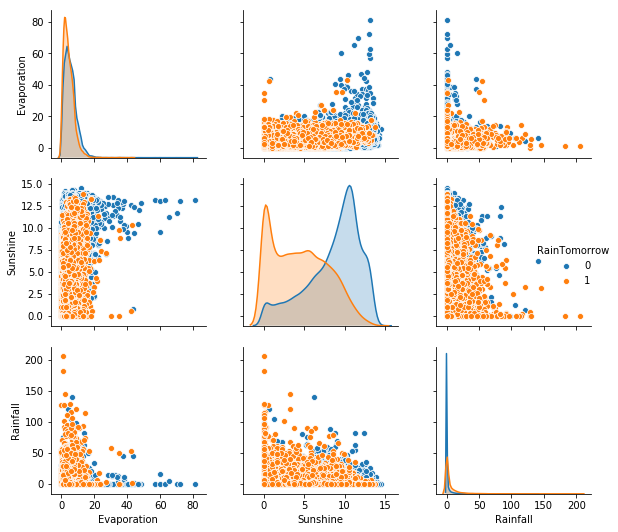

In [5]:
sns.pairplot(rain,hue= 'RainTomorrow',vars= ['Evaporation','Sunshine','Rainfall'])

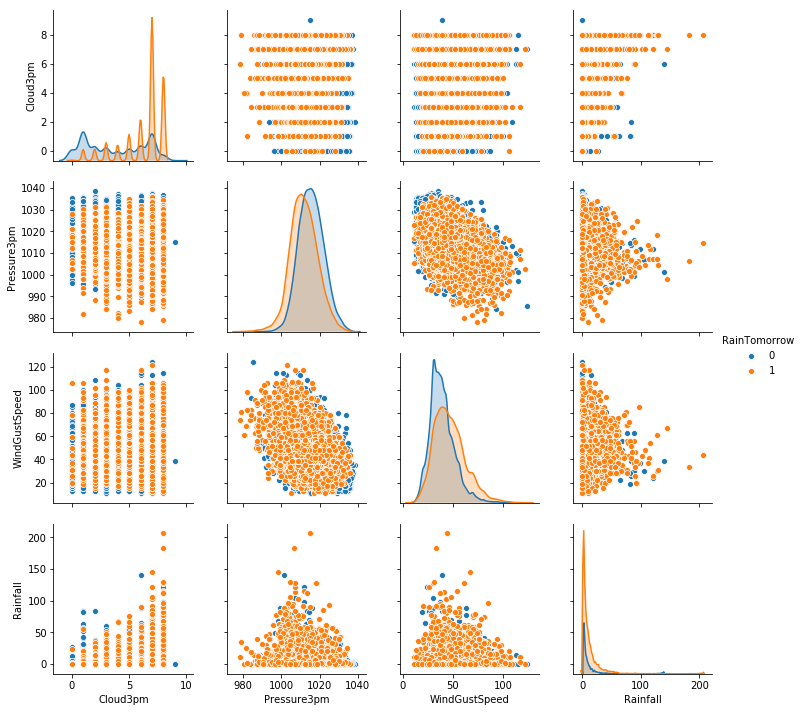

In [0]:
sns.pairplot(rain,hue= 'RainTomorrow',vars= ['Cloud3pm','Pressure3pm','WindGustSpeed','Rainfall'])

In [0]:
X = rain.drop('RainTomorrow', axis=1)
y = rain['RainTomorrow']


In [0]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
9,3.2,12.1,0.0,2.8,3.9,2,41.0,9,9,17.0,20.0,69.0,51.0,1033.6,1033.2,7.0,5.0,9.3,11.1,0
10,8.9,21.5,0.0,2.6,4.5,15,20.0,5,13,9.0,11.0,80.0,57.0,1021.8,1020.8,7.0,3.0,13.1,20.7,0
11,23.1,32.5,0.0,9.8,9.9,4,35.0,5,1,15.0,28.0,65.0,60.0,1012.7,1009.4,7.0,3.0,28.7,30.9,0
17,24.2,35.6,0.0,19.4,2.7,15,65.0,15,14,20.0,30.0,39.0,39.0,1004.4,1004.3,7.0,7.0,30.8,33.5,0
19,12.9,21.4,0.6,0.4,9.6,2,22.0,12,2,4.0,9.0,76.0,57.0,1031.6,1029.4,3.0,2.0,16.6,19.5,0


In [0]:
y.head()

9     0
10    1
11    0
17    0
19    0
Name: RainTomorrow, dtype: int8

# Data Training

Spliting the data into two categories: the training set and the testing set

In [0]:
# split into train and test data sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, y_train.shape


((31484, 20), (31484,))

In [9]:
X_test.shape, y_test.shape

((7872, 20), (7872,))

# Decision Trees


In [10]:
# model
tree = DecisionTreeClassifier()

# train
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
tree.export_graphviz(tree)

AttributeError: ignored

In [11]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

1.0
0.7957317073170732


In [18]:
# model
forest = RandomForestClassifier(criterion = 'entropy')

# train
forest.fit(X_train, y_train)

# predict
forest_predictions = forest.predict(X_test)

# feature importances
print(pd.DataFrame({'Importance': forest.feature_importances_}, index = X_train.columns).sort_values('Importance', ascending = False))

# confusion matrix
pd.crosstab(y_test, forest_predictions, rownames=['Actual'], colnames = ['Predicted:'], margins = True)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


               Importance
Humidity3pm      0.134084
Sunshine         0.098936
Cloud3pm         0.077575
Pressure3pm      0.063965
Pressure9am      0.062552
WindGustSpeed    0.054607
Rainfall         0.050528
Humidity9am      0.048244
MinTemp          0.043565
Temp3pm          0.042523
MaxTemp          0.042500
Evaporation      0.041609
Temp9am          0.040719
Cloud9am         0.033763
WindSpeed3pm     0.033177
WindSpeed9am     0.032475
WindDir9am       0.029581
WindGustDir      0.029042
WindDir3pm       0.029032
RainToday        0.011523


Predicted:,0,1,All
Actual,,,
0,5912,246,6158
1,883,831,1714
All,6795,1077,7872


In [19]:
forest.score(X_test, y_test) # mispredicted one sample. The random forest was worse than the single decision tree!

0.8565802845528455

# Decision Trees using top 5 important features



In [13]:
X2 = X[['Humidity3pm','Sunshine','Pressure9am','Pressure3pm','Cloud3pm']]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)
# model
tree = DecisionTreeClassifier()

# train
tree.fit(X_train2, y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [14]:
print(tree.score(X_train2, y_train2))
print(tree.score(X_test2, y_test2))

0.9999682378350908
0.7827743902439024


In [15]:
# model
forest = RandomForestClassifier(criterion = 'entropy')

# train
forest.fit(X_train2, y_train2)

# predict
forest_predictions = forest.predict(X_test2)

# feature importances
print(pd.DataFrame({'Importance': forest.feature_importances_}, index = X_train2.columns).sort_values('Importance', ascending = False))

# confusion matrix
pd.crosstab(y_test2, forest_predictions, rownames=['Actual'], colnames = ['Predicted:'], margins = True)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


             Importance
Humidity3pm    0.270065
Sunshine       0.239691
Pressure3pm    0.201092
Pressure9am    0.195123
Cloud3pm       0.094029


Predicted:,0,1,All
Actual,,,
0,5793,365,6158
1,918,796,1714
All,6711,1161,7872


In [16]:
forest.score(X_test2, y_test2) # mispredicted one sample. The random forest was worse than the single decision tree!

0.8370172764227642

# Data Feature Correlations


In [0]:
rain.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.748780,0.113038,0.505101,0.074480,-0.189580,0.121208,-0.057162,-0.194467,0.112847,...,-0.179373,0.071178,-0.475750,-0.495688,0.105337,0.042250,0.906197,0.726630,0.050161,0.089103
MaxTemp,0.748780,1.000000,-0.066856,0.650770,0.464806,-0.243556,0.041389,-0.247102,-0.198270,-0.003978,...,-0.499327,-0.449370,-0.351927,-0.452356,-0.265224,-0.259280,0.893234,0.984749,-0.219913,-0.148378
Rainfall,0.113038,-0.066856,1.000000,-0.072218,-0.245344,0.065891,0.105231,0.092859,0.054474,0.049535,...,0.266069,0.277208,-0.179660,-0.137413,0.218027,0.189895,0.014806,-0.070809,0.551606,0.252166
Evaporation,0.505101,0.650770,-0.072218,1.000000,0.369179,-0.105604,0.208636,-0.132117,-0.069735,0.192445,...,-0.555146,-0.421819,-0.295217,-0.323218,-0.201905,-0.205095,0.593329,0.630329,-0.214667,-0.127729
Sunshine,0.074480,0.464806,-0.245344,0.369179,1.000000,-0.089226,-0.050373,-0.114520,-0.048716,-0.013211,...,-0.500839,-0.630979,0.044009,-0.020666,-0.679331,-0.701748,0.288840,0.487104,-0.327794,-0.453077
WindGustDir,-0.189580,-0.243556,0.065891,-0.105604,-0.089226,1.000000,0.118357,0.426915,0.617301,0.007309,...,0.096741,0.056108,-0.118947,-0.023052,0.079628,0.082589,-0.231600,-0.258013,0.145869,0.059399
WindGustSpeed,0.121208,0.041389,0.105231,0.208636,-0.050373,0.118357,1.000000,0.019504,0.113333,0.606789,...,-0.194734,-0.043712,-0.432358,-0.386223,0.087028,0.130925,0.090532,0.004947,0.144468,0.235525
WindDir9am,-0.057162,-0.247102,0.092859,-0.132117,-0.114520,0.426915,0.019504,1.000000,0.316115,-0.011600,...,0.164822,0.193513,-0.035093,0.058863,0.115079,0.075895,-0.150793,-0.253890,0.179094,0.036240
WindDir3pm,-0.194467,-0.198270,0.054474,-0.069735,-0.048716,0.617301,0.113333,0.316115,1.000000,0.031880,...,0.053275,-0.004447,-0.119656,-0.021417,0.045142,0.058255,-0.210929,-0.211770,0.122826,0.029250
WindSpeed9am,0.112847,-0.003978,0.049535,0.192445,-0.013211,0.007309,0.606789,-0.011600,0.031880,1.000000,...,-0.235897,-0.059825,-0.205797,-0.159957,0.036591,0.062770,0.057265,-0.013831,0.084301,0.083964


# Pairing Features with the Highest Correlations




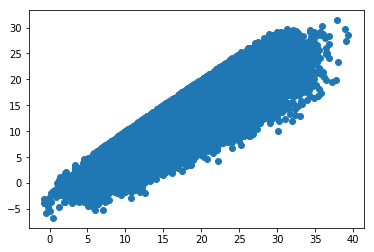

In [0]:
rain = rain.dropna()
plt.scatter(rain['Temp9am'], rain['MinTemp'])
plt.show()

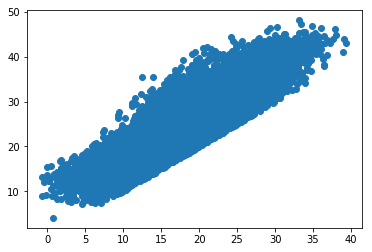

In [0]:
plt.scatter(rain['Temp9am'], rain['MaxTemp'])
plt.show()

In [0]:
X_data = rain[['Temp9am']] # must be a dataframe for linear regression
Y_data = rain['MinTemp']

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=1) # how to split the data using an sklearn function

In [0]:
lin = LinearRegression()
lin.fit(x_train, y_train)
print(lin.coef_)
print(lin.intercept_)

NameError: ignored

In [0]:
lin.predict(x_train)

In [0]:
print(r2_score(lin.predict(x_train), y_train))

# the default .score() method of a regression model is r2_score
# so here is another way to see the r^2 score
print(lin.score(x_train, y_train))

The DummyClassifier doesn't use any of the columns as features

In [0]:
clf = DummyClassifier() 
clf.fit(X_train, y_train)

In [0]:
clf.predict(X_test)

In [0]:
clf.score(X_test, y_test)  

**Adding new data columns **

# Results

##Scores of using each method

Decision Tree: 0.8503556910569106 \\
Decision Tree (Top 5 Importances):  0.8407012195121951 \\
Linear Regression: 0.820536950500822

# Submitting

## Your submission will be a function called `submission()`
- `submission()` should take in 1 parameter, `test_dataset_filename`
    - this is the filename of a csv with the same format as `node_s19_ml_competition_train.csv`
    
    
- `submission()` should be a self contained function that does not rely on any outside variables


- `submission()` will train your model using the data in `node_s19_ml_competition_train.csv` and then evaluate it on the data contained in `node_s19_ml_competition_test.csv` (hidden)


- `submission()` should return the accuracy of your model on the dataset in `test_dataset_filename`


- We highly recommend creating a `preprocess()` function that takes in an uncleaned dataframe and returns a dataframe with all the necessary modifications for use in your model
    - We recommend creating a function because both the train ***AND*** the test datasets need to go through the same preprocessing steps


**Below is an example submission using `sklearn`'s `DummyClassifier`:**

In [0]:
def preprocess(df_raw):
    """
    Change this method and add all of your preprocessing functions
    
    Could include picking/creating features, cleaning data, and 
    doing one-hot encoding
    """
  
    rain = rain_raw.drop("Date", axis=1).dropna()    
    
    
    df["WindDir9am"] = df["WindDir9am"].astype('category')
    df["WindGustDir"] = df["WindGustDir"].astype('category')
    df["WindDir3pm"] = df["WindDir3pm"].astype('category')
    df["RainToday"] = df["RainToday"].astype('category')
    df["RainTomorrow"] = df["RainTomorrow"].astype('category')

    df["WindDir9am"] = df["WindDir9am"].cat.codes
    df["WindGustDir"] = df["WindGustDir"].cat.codes
    df["WindDir3pm"] = df["WindDir3pm"].cat.codes
    df["RainToday"] = df["RainToday"].cat.codes
    df["RainTomorrow"] = df["RainTomorrow"].cat.codes
    
    return df

In [0]:
def submission():
    """
    This method won't work as-is on Colab because you don't have the
    'node_s19_ml_competition_test.csv' file. You could test it by creating
    a dummy file with that name, but we can debug it if you submit
    it and it doesn't work :)
    
    Please do most of your work in the preprocess() function! In this 
    function, you should only change the "DummyClassifier()" to the model
    that you are using.
    """
  
  
    rain_raw = pd.read_csv('node_s19_ml_competition_train.csv')
    
    rain = preprocess(rain_raw)
    
    X = rain.drop('RainTomorrow', axis=1)
    y = rain['RainTomorrow']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
        # model
    tree = DecisionTreeClassifier()

    # train
    tree.fit(X_train, y_train)

    
    
        # model
    forest = RandomForestClassifier(criterion = 'entropy')

    # train
    forest.fit(X_train, y_train)

    # predict
    forest_predictions = forest.predict(X_test)

    # feature importances
#     print(pd.DataFrame({'Importance': forest.feature_importances_}, index = X_train.columns).sort_values('Importance', ascending = False))

    # confusion matrix
    pd.crosstab(y_test, forest_predictions, rownames=['Actual'], colnames = ['Predicted:'], margins = True)
    
    
    fs1= forest.score(X_test, y_test) # mispredicted one sample. The random forest was worse than the single decision tree!
    
    X2 = X[['Humidity3pm','Sunshine','Pressure9am','Pressure3pm','Cloud3pm']]

    X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42)
    # model
    tree = DecisionTreeClassifier()

    # train
    tree.fit(X_train2, y_train2)
    
        # model
    forest = RandomForestClassifier(criterion = 'entropy')

    # train
    forest.fit(X_train2, y_train2)

    # predict
    forest_predictions = forest.predict(X_test2)

    # feature importances
#     print(pd.DataFrame({'Importance': forest.feature_importances_}, index = X_train2.columns).sort_values('Importance', ascending = False))

    # confusion matrix
    pd.crosstab(y_test2, forest_predictions, rownames=['Actual'], colnames = ['Predicted:'], margins = True)
    
    fs2 = forest.score(X_test2, y_test2) # mispredicted one sample. The random forest was worse than the single decision tree!
    
    return fs1,fs2
    


In [0]:
submission()

# Data Reference
## Columns
- `Date`: The date of observation
- `MinTemp`: The minimum temperature in degrees celsius
- `MaxTemp`: The maximum temperature in degrees celsius
- `Rainfall`: The amount of rainfall recorded for the day in mm
- `Evaporation`: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- `Sunshine`: The number of hours of bright sunshine in the day.
- `WindGustDir`: The direction of the strongest wind gust in the 24 hours to midnight
- `WindGustSpeed`: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- `WindDir9am`: Direction of the wind at 9am
- `WindDir3pm`: Direction of the wind at 3pm
- `WindSpeed9am`: Wind speed (km/hr) averaged over 10 minutes prior to 9am
- `WindSpeed3pm`: Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- `Humidity9am`: Humidity (percent) at 9am
- `Humidity3pm`: Humidity (percent) at 3pm
- `Pressure9am`: Atmospheric pressure (hpa) reduced to mean sea level at 9am
- `Pressure3pm`: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- `Cloud9am`: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
- `Cloud3pm`: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
- `Temp9am`: Temperature (degrees C) at 9am
- `Temp3pm`: Temperature (degrees C) at 3pm
- `RainToday`: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- `RainTomorrow`: ***The target variable***. Did it rain tomorrow?